In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [36]:
yubb = pd.read_csv('./data/external/treated_base.csv')

In [37]:
yubb = yubb.loc[yubb['Dt_obs'] == list(yubb['Dt_obs'].sort_values())[-1]]

In [38]:
yubb.head()

,Produto,Rem_index,Rem_taxa,Emissor,Distribuidor,Dt_venc,Dt_carencia,Val_aplic,CETIP_certifica,Liquidez,Dt_obs,Duracao_util,Duracao_meses,Duracao_corr
32716,CDB,CDI,106.0,ABC,Genial,2020-11-03,NaN,30000.0,NaN,vencimento,2020-05-06,125,6.0,181.0
32717,CDB,CDI,108.0,ABC,Genial,2021-05-03,NaN,30000.0,NaN,vencimento,2020-05-06,248,12.0,362.0
32718,CDB,CDI,109.0,ABC,Genial,2022-04-27,NaN,30000.0,NaN,vencimento,2020-05-06,496,24.0,721.0
32719,CDB,CDI,109.0,ABC,Genial,2023-04-24,NaN,30000.0,NaN,vencimento,2020-05-06,745,36.0,1080.0
32720,LCA,CDI,100.0,ABC,Genial,2020-11-03,NaN,30000.0,NaN,vencimento,2020-05-06,125,6.0,181.0


In [39]:
diaria = yubb.loc[(yubb['Liquidez'] == 'diaria')]

In [40]:
diaria.head()

,Produto,Rem_index,Rem_taxa,Emissor,Distribuidor,Dt_venc,Dt_carencia,Val_aplic,CETIP_certifica,Liquidez,Dt_obs,Duracao_util,Duracao_meses,Duracao_corr
32790,CDB,CDI,99.0,Plural,Genial,2023-04-24,NaN,1000.0,NaN,diaria,2020-05-06,745,36.0,1080.0
32794,CDB,CDI,100.0,AJRenner,Genial,2023-04-24,NaN,1000.0,NaN,diaria,2020-05-06,745,36.0,1080.0
32837,CDB,CDI,99.0,BR Partners,Genial,2021-05-06,NaN,1000.0,NaN,diaria,2020-05-06,251,12.0,365.0
32844,CDB,CDI,90.0,CGD,Genial,2022-04-27,NaN,10000.0,NaN,diaria,2020-05-06,496,24.0,721.0
32888,CDB,CDI,103.0,BS2,Genial,2022-04-27,NaN,5000.0,NaN,diaria,2020-05-06,496,24.0,721.0


In [53]:
diaria = diaria.loc[diaria['Val_aplic'] <= 1000]

In [54]:
corretoras = diaria.loc[(diaria['Distribuidor'] == 'Easynvest') | (diaria['Distribuidor'] == 'XP') | (diaria['Distribuidor'] == 'Inter')]

In [55]:
corretoras = corretoras.groupby(['Distribuidor', 'Duracao_meses', 'Produto']).agg({
    'Rem_taxa':'max'
}).reset_index()

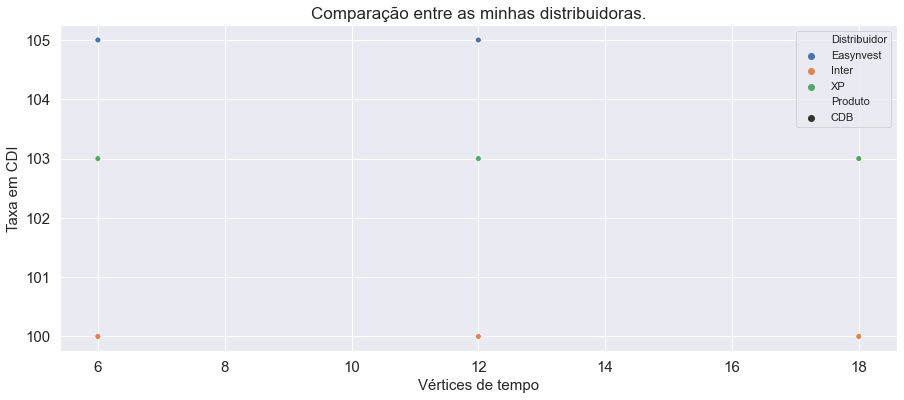

In [57]:
plt.figure(figsize=(15, 6))
sns.set(style="darkgrid")

# cdi_xp = xp[['Rem_taxa', 'Duracao_meses']].groupby('Duracao_meses').max().reset_index()
# cdi_easy = easy[['Rem_taxa', 'Duracao_meses']].groupby('Duracao_meses').max().reset_index()
# cdi_inter = inter[['Rem_taxa', 'Duracao_meses']].groupby('Duracao_meses').max().reset_index()

# ax = sns.scatterplot(x="Duracao_meses", y="Rem_taxa", data=cdi_xp, label = 'XP')
# ax = sns.scatterplot(x="Duracao_meses", y="Rem_taxa", data=cdi_easy, label = 'Easynvest')
# ax = sns.scatterplot(x="Duracao_meses", y="Rem_taxa", data=cdi_inter, label = 'Inter', palette = 'g')
ax = sns.scatterplot(x = 'Duracao_meses', y = 'Rem_taxa', data = corretoras, hue = 'Distribuidor', style = 'Produto')

ax.set_xlabel("Vértices de tempo",fontsize=15)
ax.set_ylabel('Taxa em CDI',fontsize=15)
ax.set_title('Comparação entre as minhas distribuidoras.', fontsize = 17)
ax.tick_params(labelsize=15)